In [2]:
import pandas as pd

In [3]:
# create dataframe from RAVDESS audio files
rootdir = 'data/RAVDESS/Audio_Speech_Actors_01-24/'
wavefile_list = []
for root, dirs, files in os.walk(rootdir):
    for name in files:
        if name[-4:] == '.wav':
            wavefile_list.append(os.path.join(root, name))

#print(wavefile_list)

In [4]:
emotion = []
isfemale = []
actor_id_list = []

for f in wavefile_list:
    part = f.split('.')[0].split('-')
    emotion.append(int(part[3]))
    actor_id = int(part[7])
    actor_id_list.append(actor_id)
    if actor_id%2 == 0:
        isfemale.append(True)    
    else:
        isfemale.append(False)


data_dict = {'filePath': wavefile_list, \
    'emotion': emotion, \
    'isFemale': isfemale, \
    'actorId': actor_id_list}
df = pd.DataFrame(data_dict)

In [5]:
df

,filePath,emotion,isFemale,actorId
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16
...,...,...,...,...
1435,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,3,True,8
1436,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,3,True,8
1437,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,2,True,8
1438,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_0...,2,True,8


In [14]:
import librosa
df['duration'] = [ librosa.get_duration(filename = x) for x in df['filePath']]

In [7]:
df.head()

,filePath,emotion,isFemale,actorId,duration
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,3.903896
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,3.570229
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,3.737062
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,3.970646
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,3.770437


In [15]:
import math
df['duration'] = [ math.ceil(x) for x in df['duration']]


In [16]:
df.head()

,filePath,emotion,isFemale,actorId,duration
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,4
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,4
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,4
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,4
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,4


In [18]:
df.duration.value_counts()

4    1183
5     252
6       3
3       2
Name: duration, dtype: int64

In [ ]:
import matplotlib as plt
plt.

In [10]:
max(df.duration)

5.2719375

In [33]:
df.to_csv('RAVDESS_speech.csv', index=False)

<AxesSubplot:>

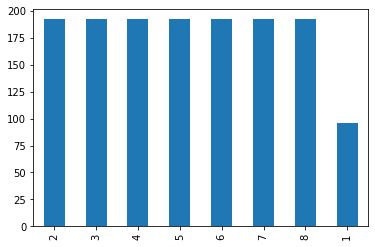

In [34]:
df.emotion.value_counts().plot(kind='bar')